# **Predicting Wine Quality Using Several Wine Features**

**EDA**

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance # computing feature importance
from sklearn.ensemble import RandomForestRegressor
from scipy.stats.stats import pearsonr

In [4]:
df = pd.read_csv("/content/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63907e8410>],
      dtype=object)

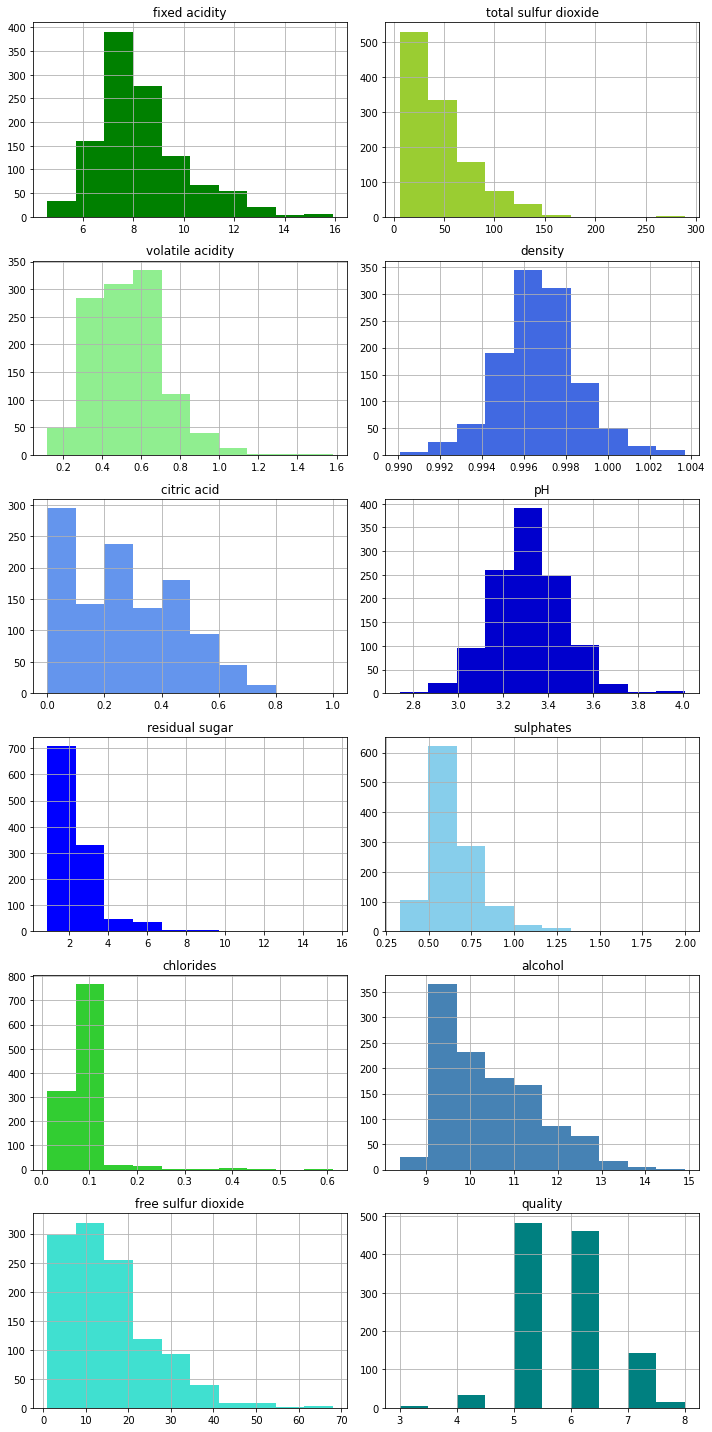

In [6]:
# Univariate Analysis: Histograms

fig, ax = plt.subplots(6, 2, figsize = (10, 20), tight_layout=True)
df.hist(column= ["fixed acidity"], ax=ax[0][0], color='green')
df.hist(column= ['volatile acidity'], ax=ax[1][0], color='lightgreen')
df.hist(column= ["citric acid"], ax=ax[2][0], color='cornflowerblue')
df.hist(column= ['residual sugar'], ax=ax[3][0], color='blue')
df.hist(column= ['chlorides'], ax=ax[4][0], color='limegreen')
df.hist(column= ['free sulfur dioxide'], ax=ax[5][0], color='turquoise')
df.hist(column= ['total sulfur dioxide'], ax=ax[0][1], color='yellowgreen')
df.hist(column= ['density'], ax=ax[1][1], color='royalblue')
df.hist(column= ['pH'], ax=ax[2][1], color='mediumblue')
df.hist(column= ['sulphates'], ax=ax[3][1], color='skyblue')
df.hist(column= ['alcohol'], ax=ax[4][1], color='steelblue')
df.hist(column= ['quality'], ax=ax[5][1], color='teal')

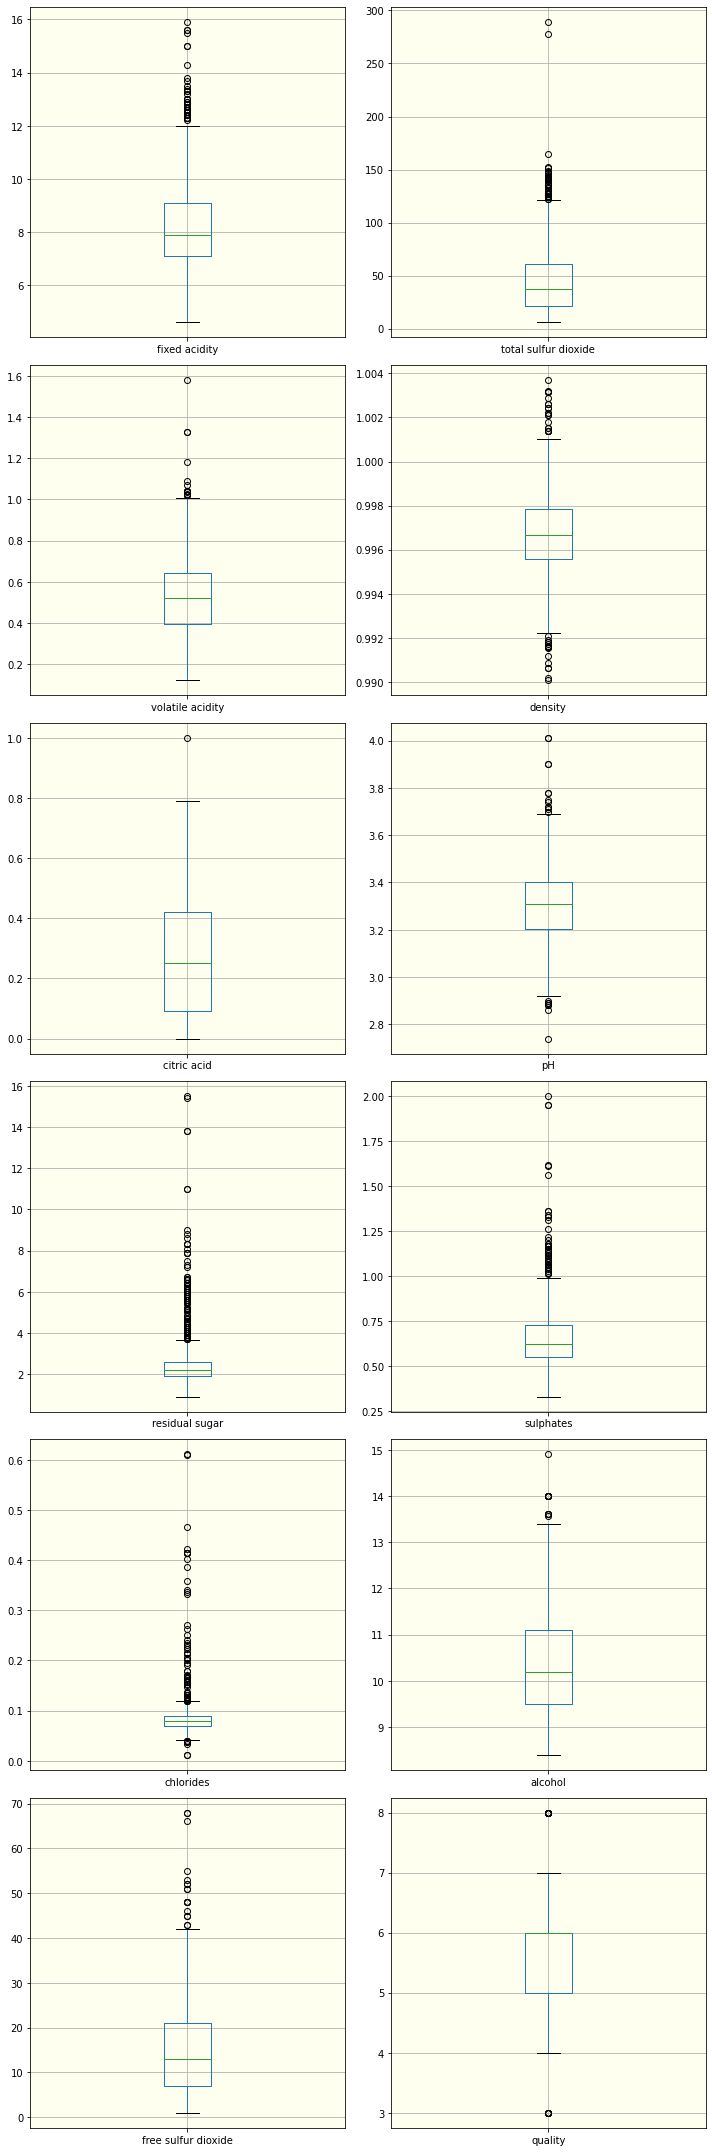

In [7]:
# Univariate Analysis: Boxplots

fig, ax = plt.subplots(6, 2, figsize = (10, 30), tight_layout=True)
df.boxplot(column= ["fixed acidity"], ax=ax[0][0]).set_facecolor('ivory')
df.boxplot(column= ['volatile acidity'], ax=ax[1][0]).set_facecolor('ivory')
df.boxplot(column= ["citric acid"], ax=ax[2][0]).set_facecolor('ivory')
df.boxplot(column= ['residual sugar'], ax=ax[3][0]).set_facecolor('ivory')
df.boxplot(column= ['chlorides'], ax=ax[4][0]).set_facecolor('ivory')
df.boxplot(column= ['free sulfur dioxide'], ax=ax[5][0]).set_facecolor('ivory')
df.boxplot(column= ['total sulfur dioxide'], ax=ax[0][1]).set_facecolor('ivory')
df.boxplot(column= ['density'], ax=ax[1][1]).set_facecolor('ivory')
df.boxplot(column= ['pH'], ax=ax[2][1]).set_facecolor('ivory')
df.boxplot(column= ['sulphates'], ax=ax[3][1]).set_facecolor('ivory')
df.boxplot(column= ['alcohol'], ax=ax[4][1]).set_facecolor('ivory')
df.boxplot(column= ['quality'], ax=ax[5][1]).set_facecolor('ivory')

In [8]:
## Corrleation Matrix 

corrMatrix = df.corr()
print (corrMatrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

Text(0, 0.5, 'volatile acidity')

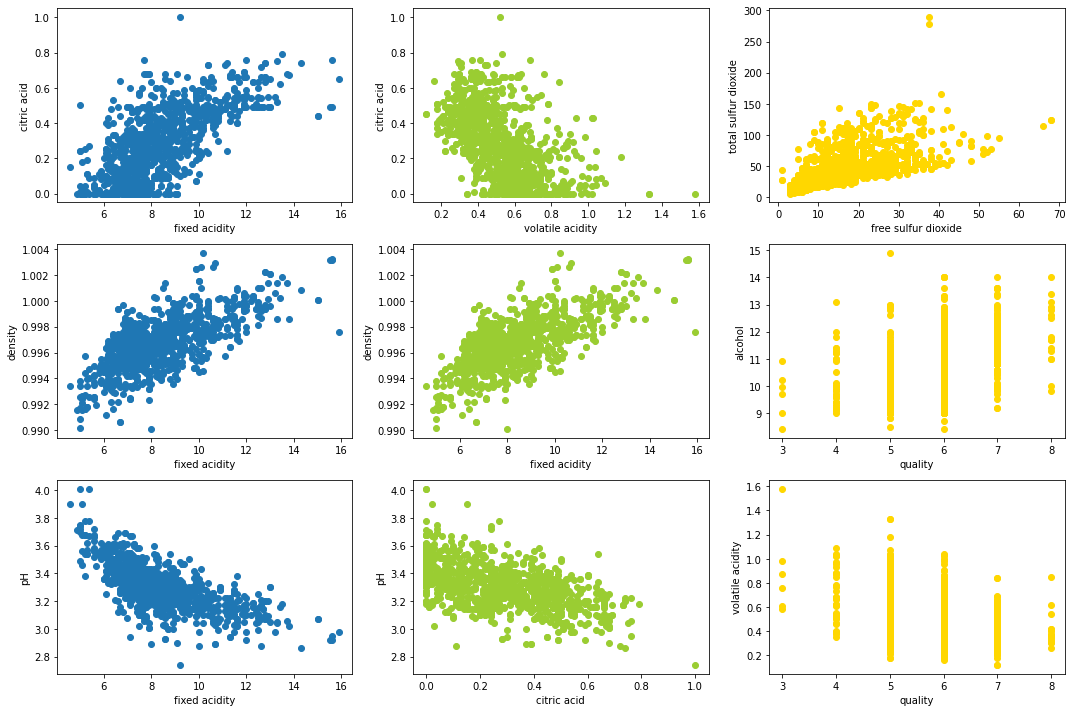

In [9]:
fig, ax = plt.subplots(3,3, figsize=(15, 10), tight_layout=True)
ax[0][0].scatter(x = df['fixed acidity'], y = df['citric acid'])
ax[0][0].set_xlabel("fixed acidity")
ax[0][0].set_ylabel("citric acid")

ax[1][0].scatter(x = df['fixed acidity'], y = df['density'])
ax[1][0].set_xlabel("fixed acidity")
ax[1][0].set_ylabel("density")

ax[2][0].scatter(x = df['fixed acidity'], y = df['pH'])
ax[2][0].set_xlabel("fixed acidity")
ax[2][0].set_ylabel("pH")

ax[0][1].scatter(x = df['volatile acidity'], y = df['citric acid'], color='yellowgreen')
ax[0][1].set_xlabel("volatile acidity")
ax[0][1].set_ylabel("citric acid")

ax[1][1].scatter(x = df['fixed acidity'], y = df['density'], color='yellowgreen')
ax[1][1].set_xlabel("fixed acidity")
ax[1][1].set_ylabel("density")

ax[2][1].scatter(x = df['citric acid'], y = df['pH'], color='yellowgreen')
ax[2][1].set_xlabel("citric acid")
ax[2][1].set_ylabel("pH")

ax[0][2].scatter(x = df['free sulfur dioxide'], y = df['total sulfur dioxide'], color='gold')
ax[0][2].set_xlabel("free sulfur dioxide")
ax[0][2].set_ylabel("total sulfur dioxide")

ax[1][2].scatter(x = df['quality'], y = df['alcohol'], color='gold')
ax[1][2].set_xlabel("quality")
ax[1][2].set_ylabel("alcohol")

ax[2][2].scatter(x = df['quality'], y = df['volatile acidity'], color='gold')
ax[2][2].set_xlabel("quality")
ax[2][2].set_ylabel("volatile acidity")

In [10]:
df.quality.value_counts().sort_index(ascending=True)

3      6
4     33
5    483
6    462
7    143
8     16
Name: quality, dtype: int64

In [11]:
df['quality']= df.quality.round()
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [12]:
y = df['quality']
X = df.drop(['quality', 'Id'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle = True, train_size=0.6, test_size=0.4, random_state=1)   

In [13]:
print(y_valid)

314     5
698     5
846     6
1136    6
1097    6
       ..
218     5
997     6
918     6
265     6
548     6
Name: quality, Length: 458, dtype: int64


# Decision Tree Model without Max-Leaf

In [14]:
# Define model. Specify a number for random_state to ensure same results each run
model_tree_base = DecisionTreeRegressor(random_state=1)

# Fit model
model_tree_base.fit(X_train, y_train)

# Prediction
y_pred_tree_base = model_tree_base.predict(X_valid)

print(model_tree_base.tree_.node_count)

379


In [15]:
# Calculate MAE 
mae_dt_base = mean_absolute_error(y_pred_tree_base, y_valid)

print("Mean Absolute Error - Base Decision Tree:" , mae_dt_base)

Mean Absolute Error - Base Decision Tree: 0.4868995633187773


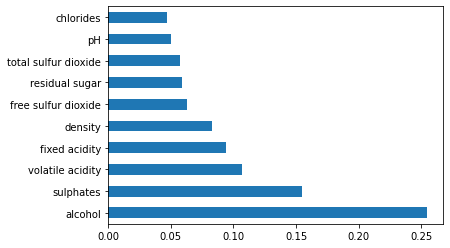

In [16]:
# Calculating feature importance
feat_importances = pd.Series(model_tree_base.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

**Decision Tree Model with Max_Leaf**

In [17]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model_max_leaf = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model_max_leaf.fit(X_train, y_train)
    y_pred = model_max_leaf.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    return(mae)

In [18]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 200, 400]

scores = {leaf_size: get_mae(leaf_size, X_train, X_valid, y_train, y_valid) 
          for leaf_size in candidate_max_leaf_nodes}

print(scores)
best_tree_size = min(scores, key=scores.get)

best_tree_size

{5: 0.5574791980974173, 25: 0.5216864876487703, 50: 0.49935784113876164, 100: 0.4973109226496856, 200: 0.46943231441048033, 400: 0.46943231441048033}


200

In [19]:
#Based on the provided results above, the best tree size is with 200 max leaf nodes 

model_leaf_200 = DecisionTreeRegressor(max_leaf_nodes=200, random_state=0)
model_leaf_200.fit(X_train, y_train)
y_pred_200 = model_leaf_200.predict(X_valid)
mae_leaf = mean_absolute_error(y_valid, y_pred_200)
print(mae_leaf)

0.46943231441048033


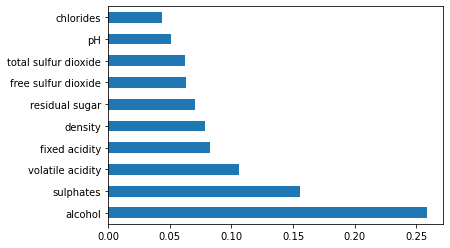

In [20]:
# Calculating feature importance
feat_importances = pd.Series(model_leaf_200.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

**Random Forest**

In [21]:
model_RF = RandomForestRegressor(random_state=1)

# Fitting the model 
model_RF.fit(X_train, y_train)

# Prediction
y_pred_RF = model_RF.predict(X_valid)

In [22]:
# Calculate MAE 
mae_RF = mean_absolute_error(y_pred_RF, y_valid)

print("Mean Absolute Error Random Forest:" , mae_RF)

Mean Absolute Error Random Forest: 0.43995633187772926


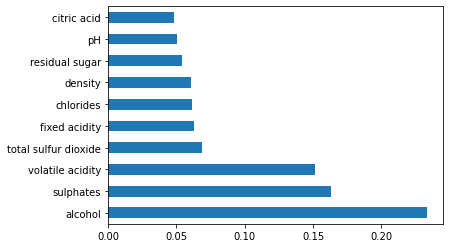

In [23]:
# Calculating feature importance
feat_importances = pd.Series(model_RF.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

**Conclusion**

In [24]:
print("Mean Absolute Error - Random Forest:" , mae_RF)
print("Mean Absolute Error - Base Decision Tree:" , mae_dt_base)
print("Mean Absolute Error - Decision Tree with Max Leaf:" , mae_leaf)

Mean Absolute Error - Random Forest: 0.43995633187772926
Mean Absolute Error - Base Decision Tree: 0.4868995633187773
Mean Absolute Error - Decision Tree with Max Leaf: 0.46943231441048033
